In [1]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def OHE_My_Sequence(list_of_sequences):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    
    final_ohe_seq = []
    for sequence in list_of_sequences:
        ohe_sequence = [[1 if amino_acid == char else 0 
                         for amino_acid in amino_acids] 
                         for char in sequence.strip('\n')]
        
        final_ohe_seq.append(ohe_sequence)
    
    len_lists = [len(seq_lists) for seq_lists in final_ohe_seq]
    max_len = max(len_lists)
    
    for seq_num, sequence in enumerate(final_ohe_seq):
        for i in range(max_len - len(sequence)):
            sequence = np.append(sequence, np.array([np.zeros(20)]), axis=0)
        
        final_ohe_seq[seq_num] = sequence
    
    return np.array(final_ohe_seq, dtype=int)

In [3]:
sequences = open('pdb_study/Data/Seq_With_Target/Sequence/all_seq_(for_B_sheets).txt', 'r')
targets = open('pdb_study/Data/Seq_With_Target/Target/all_targ_(for_B_sheets).txt', 'r')

array_ohe_seqs = OHE_My_Sequence(sequences)
array_targets = np.array([value.strip('\n') for value in targets])

print(array_ohe_seqs.shape)
print(array_targets.shape)

(6129, 41, 20)
(6129,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(array_ohe_seqs, 
                                                    array_targets, 
                                                    test_size=0.2, 
                                                    random_state=5)

In [5]:
model2 = Sequential()

model2.add(LSTM(128, activation='sigmoid', input_shape=(None, 20), return_sequences=True))
model2.add(LSTM(128, activation='sigmoid', return_sequences=False))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 128)         76288     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 208,001
Trainable params: 208,001
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model2.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test, y_test))

Train on 4903 samples, validate on 1226 samples
Epoch 1/10
4903/4903 [==============================] - 204s 42ms/step - loss: 0.7027 - accuracy: 0.5195 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 2/10
4903/4903 [==============================] - 201s 41ms/step - loss: 0.6965 - accuracy: 0.5231 - val_loss: 0.6844 - val_accuracy: 0.5237
Epoch 3/10
4903/4903 [==============================] - 189s 39ms/step - loss: 0.6440 - accuracy: 0.6408 - val_loss: 0.5778 - val_accuracy: 0.6917
Epoch 4/10
4903/4903 [==============================] - 190s 39ms/step - loss: 0.6017 - accuracy: 0.6814 - val_loss: 0.5187 - val_accuracy: 0.7423
Epoch 5/10
4903/4903 [==============================] - 186s 38ms/step - loss: 0.5765 - accuracy: 0.7116 - val_loss: 0.6338 - val_accuracy: 0.6639
Epoch 6/10
4903/4903 [==============================] - 183s 37ms/step - loss: 0.5644 - accuracy: 0.7330 - val_loss: 0.6549 - val_accuracy: 0.6982
Epoch 7/10
4903/4903 [==============================] - 186s 38ms/step

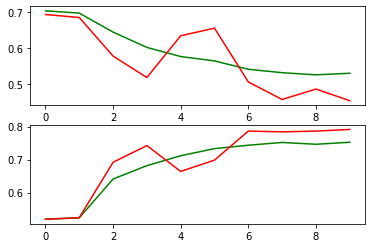

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(history.history['loss'], c='g')
ax1.plot(history.history['val_loss'], c='r')

ax2.plot(history.history['accuracy'], c='g')
ax2.plot(history.history['val_accuracy'], c='r')

plt.show()

In [8]:
result = model2.predict(x_test)

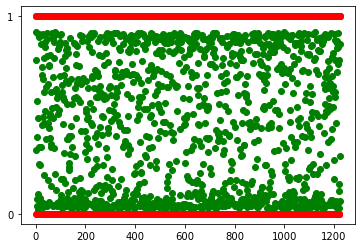

In [11]:
plt.scatter(range(len(y_test)), result, c='g')
plt.scatter(range(len(y_test)), y_test, c='r')

plt.show()

In [12]:
model2.save('BSheetPrediction.h5')

In [13]:
model2.save_weights('BSheetPredictionWeights.h5')